## EDA

# Descripción general del chunk

Este bloque de código realiza una **exploración inicial de la base de datos SQLite** `imedia.sqlite`, con el propósito de identificar las tablas disponibles y determinar cuál de ellas es más relevante para el análisis y modelado posterior.

## Pasos realizados

1. **Conexión y exploración de la base de datos:**  
   Se conecta a `../db/imedia.sqlite` y se ejecuta una consulta a `sqlite_master` para listar todas las tablas existentes.  
   Se identificaron cuatro tablas principales: `subreddits`, `authors`, `posts` y `comments`.

2. **Carga de datos:**  
   Cada tabla fue leída mediante `pandas.read_sql_query` y almacenada en un DataFrame (`authors`, `comments`, `posts`, `subreddits`).

3. **Vista preliminar:**  
   Se revisaron las primeras filas de cada tabla para entender su estructura y verificar la calidad de los datos.

4. **Cierre de conexión:**  
   La conexión se cerró correctamente para liberar recursos.

## Justificación del enfoque en la tabla `posts`

Tras revisar la estructura de la base, se determinó que **la tabla `posts` es la más adecuada para realizar el análisis y modelado**, por las siguientes razones:

- **Centralidad del contenido:** cada fila representa una publicación única, que condensa información clave sobre la interacción y desempeño dentro de los subreddits.  
- **Variables predictoras ricas:** contiene métricas cuantitativas (`score`, `num_comments`, `created_utc`) y cualitativas (`title`, `selftext`, `link_flair_text`, `subreddit`, `author`) que permiten abordar tanto análisis descriptivos como modelos de predicción.  
- **Integración natural con otras tablas:** puede relacionarse fácilmente con `authors` y `subreddits` para enriquecer el análisis, sin perder su enfoque principal.  
- **Objetivo analítico claro:** al centrarnos en los posts, se pueden construir modelos orientados a explicar o predecir el rendimiento de una publicación (por ejemplo, su puntuación o nivel de interacción).

En síntesis, la tabla `posts` actúa como el **núcleo del ecosistema de datos**, integrando dimensiones de autor, comunidad y contenido, lo que la convierte en el punto de partida más lógico para el análisis exploratorio y la fase de modelado.



In [ ]:
import sqlite3
import pandas as pd


db_path = "../db/imedia.sqlite"
conn = sqlite3.connect(db_path)

# Mostrar las tablas disponibles
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tablas disponibles:")
print(tables)

# Leer los datos de cada tabla
authors = pd.read_sql_query("SELECT * FROM authors;", conn)
comments = pd.read_sql_query("SELECT * FROM comments;", conn)
posts = pd.read_sql_query("SELECT * FROM posts;", conn)
subreddits = pd.read_sql_query("SELECT * FROM subreddits;", conn)

# Visualizar primeras filas de cada tabla
print("\n=== Tabla: authors ===")
display(authors.head())

print("\n=== Tabla: comments ===")
display(comments.head())

print("\n=== Tabla: posts ===")
display(posts.head())

print("\n=== Tabla: subreddits ===")
display(subreddits.head())

# Cerrar la conexión
conn.close()


Tablas disponibles:
         name
0  subreddits
1     authors
2       posts
3    comments

=== Tabla: authors ===


,author_name
0,Typical_Wafer_1324
1,krobzaur
2,ITagEveryone
3,ditlevrisdahl
4,geovane_jeff



=== Tabla: comments ===


,comment_id,post_id,author,body,created_utc,parent_id,link_id,score,is_submitter
0,ng4q0es,1nq1588,Present_Tonight1813,I made a program that prompts the user for a s...,1.758810e+09,t3_1nq1588,t3_1nq1588,2,0
1,ng4cg2y,1nq1588,cptsdemon,I made a tool called [PyLiveDev](https://pypi....,1.758805e+09,t3_1nq1588,t3_1nq1588,2,0
2,ng6dq2g,1nq1588,Fr1dge21,As my first project I managed to automate stoc...,1.758827e+09,t3_1nq1588,t3_1nq1588,4,0
3,ng8r3e5,1nq1588,AdventPriest,"Full disclosure, I've leaned heavily on AI to ...",1.758856e+09,t1_ng4aj2a,t3_1nq1588,1,0
4,ng5ys9z,1nq1588,geovane_jeff,My own backup app :D saves me every week!,1.758822e+09,t3_1nq1588,t3_1nq1588,4,0



=== Tabla: posts ===


,post_id,title,selftext,url,permalink,score,num_comments,over_18,created_utc,link_flair_text,is_self,spoiler,locked,thumbnail,subreddit,author
0,1nqnm44,PEP 806 – Mixed sync/async context managers wi...,PEP 806 – Mixed sync/async context managers wi...,https://www.reddit.com/r/Python/comments/1nqnm...,/r/Python/comments/1nqnm44/pep_806_mixed_synca...,107,19,0,1.758847e+09,News,1,0,0,self,PYTHON,kirara0048
1,1nqfyqh,Looking for Feedback and suggestions: Soundmen...,[Soundmentations](https://github.com/saumyarr8...,https://www.reddit.com/r/Python/comments/1nqfy...,/r/Python/comments/1nqfyqh/looking_for_feedbac...,3,0,0,1.758828e+09,Discussion,1,0,0,self,PYTHON,saumyarr8
2,1nq45ep,migrating from django to FastAPI,We've hit the scaling wall with our decade-old...,https://www.reddit.com/r/Python/comments/1nq45...,/r/Python/comments/1nq45ep/migrating_from_djan...,19,53,0,1.758800e+09,Discussion,1,0,0,self,PYTHON,No-Excitement-7974
3,1nq1588,What small Python automation projects turned o...,I’m trying to level up through practice and I’...,https://www.reddit.com/r/Python/comments/1nq15...,/r/Python/comments/1nq1588/what_small_python_a...,141,87,0,1.758788e+09,Discussion,1,0,0,self,PYTHON,MENTX3
4,1nq5x1b,PyCon AU 2025 talks are all up!,This year's PyCon AU talks have all been uploa...,https://www.reddit.com/r/Python/comments/1nq5x...,/r/Python/comments/1nq5x1b/pycon_au_2025_talks...,19,1,0,1.758805e+09,Resource,1,0,0,self,PYTHON,fphhotchips



=== Tabla: subreddits ===


,subreddit,subscribers,description,created_utc,over18
0,PYTHON,1396681,The official Python community for Reddit! Stay...,1.201231e+09,0
1,FUNNY,66782305,Reddit's largest humor depository,1.201243e+09,0
2,PUBLICFREAKOUT,4721897,"A subreddit dedicated to people freaking out, ...",1.381610e+09,0
3,ASKREDDIT,57060610,r/AskReddit is the place to ask and answer tho...,1.201233e+09,0
4,BALDURSGATE3,3214587,"A community all about Baldur's Gate III, the r...",1.559227e+09,0


# EDA inicial de la tabla `posts`

Este bloque realiza un **Análisis Exploratorio de Datos (EDA)** sobre `posts` para revisar estructura, calidad y comportamiento de variables clave que servirán de base para el modelado.

## Descripción de las acciones

1. **Exploración general**
   - `posts` contiene **1542 registros y 16 columnas**.  
   - Tipos de datos: **9 `object`**, **6 `int64`**, **1 `float64`**.  
   - Columnas: `post_id`, `title`, `selftext`, `url`, `permalink`, `score`, `num_comments`, `over_18`, `created_utc`, `link_flair_text`, `is_self`, `spoiler`, `locked`, `thumbnail`, `subreddit`, `author`.

2. **Valores nulos**
   - Solo `link_flair_text` presenta **368 nulos**.  
   - El resto de columnas **no tiene** valores faltantes.  
   - La salida del código imprime la tabla ordenada de nulos para confirmarlo.

3. **Descripción de variables (resumen)**


| Tipo | Variable | Descripción | Observaciones |
|---|---|---|---|
| ID | `post_id` | Identificador único del post. | Útil para joins; se considera fuga en modelado. |
| Texto | `title` | Título del post. | Siempre presente. |
| Texto | `selftext` | Cuerpo del post (si aplica). | Frecuentemente vacío en posts de enlace. |
| URL | `url` | Enlace externo o a Reddit. | Presente en todos los registros. |
| URL | `permalink` | Enlace interno a Reddit. | Rutas dentro del subreddit. |
| Métrica | `score` | Puntuación/karma del post. | Distribución con cola larga (outliers). |
| Métrica | `num_comments` | Número de comentarios. | Alta variabilidad. |
| Binaria | `over_18` | 1 si es NSFW. | ~0.6% positivos. |
| Temporal | `created_utc` | Timestamp Unix de creación. | Convertible a fecha (`created_dt`) para análisis temporal. |
| Categórica | `link_flair_text` | Flair o categoría del post. | 368 nulos. |
| Binaria | `is_self` | 1 si es post de texto, 0 si es enlace. | ~**20%** son de texto. |
| Binaria | `spoiler` | Indica spoiler. | Poco frecuente. |
| Binaria | `locked` | Comentarios bloqueados. | 0 en todos los casos. |
| Texto | `thumbnail` | Tipo de miniatura. | Poca variabilidad. |
| Categórica | `subreddit` | Comunidad del post. | Predomina **r/Python**. |
| Texto | `author` | Usuario autor. | Muchos autores únicos. |

4. **Estadísticas descriptivas (numéricas)**
- `score` → **mean 935.04**, **std 4038.68**, **p50 22**, **p75 182**, **max 65830**.  
- `num_comments` → **mean 89.77**, **std 379.98**, **p50 7**, **p75 35**, **max 6411**.  
- Binarias (`is_self`, `spoiler`, `over_18`) muestran baja proporción de 1’s, excepto `is_self` (~0.20).

5. **Distribución de variables (gráficas)**
- Los histogramas de **`score`** y **`num_comments`** confirman **asimetría positiva marcada** (cola larga).  
- Implicación: conviene **clipping** o **transformación logarítmica** antes del modelado.

6. **Análisis categórico**
- **Top 10 flairs**: destacan *Cat Picture - OC*, *No Paywall*, *music*, *Possible Paywall*, *Discussion*, *discussion*, *Artwork*, *article*, *Baking Advice Needed*, *Question*.  
- Señal de mezcla entre contenido informativo, artístico y de entretenimiento.

7. **Tipo de publicación (`is_self`)**
- El conteo indica que **~80% son enlaces (is_self=0)** y **~20% son posts de texto (is_self=1)**.  
- La comunidad privilegia compartir recursos externos.

8. **Correlaciones numéricas**
- **`score` ↔ `num_comments`: r ≈ 0.45** (positiva moderada).  
- `is_self` muestra **relación negativa leve con `score` (≈ -0.09)** → posts de texto tienden a menor puntuación.  
- `created_utc` presenta correlaciones negativas débiles con `score` y `num_comments` (≈ -0.24 / -0.26).  
- No se observan **multicolinealidades fuertes**.

9. **Tendencia temporal**
- Con `created_dt` derivado de `created_utc`, la serie muestra **tendencia creciente** en el volumen de publicaciones de finales de septiembre a noviembre de 2025, con un **pico pronunciado** a mediados de noviembre.

## Insights clave

- `posts` es **completo y consistente**, adecuado para modelado.  
- **Alta dispersión y fuerte asimetría** en `score` y `num_comments` justifican **recorte de outliers** o **`log1p`**.  
- El **engagement** (comentarios) se asocia con mayor `score`, reforzando su rol como señal principal.  
- Los flairs más comunes revelan diversidad temática; la preferencia por **enlaces** sugiere que el contenido externo impulsa la participación.  
- La tendencia temporal al alza puede aprovecharse como **feature temporal** en modelos predictivos.


=== Información general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          1542 non-null   object 
 1   title            1542 non-null   object 
 2   selftext         1542 non-null   object 
 3   url              1542 non-null   object 
 4   permalink        1542 non-null   object 
 5   score            1542 non-null   int64  
 6   num_comments     1542 non-null   int64  
 7   over_18          1542 non-null   int64  
 8   created_utc      1542 non-null   float64
 9   link_flair_text  1174 non-null   object 
 10  is_self          1542 non-null   int64  
 11  spoiler          1542 non-null   int64  
 12  locked           1542 non-null   int64  
 13  thumbnail        1542 non-null   object 
 14  subreddit        1542 non-null   object 
 15  author           1542 non-null   object 
dtypes: float64(1), int64(6), object(

None


=== Primeras filas ===


,post_id,title,selftext,url,permalink,score,num_comments,over_18,created_utc,link_flair_text,is_self,spoiler,locked,thumbnail,subreddit,author
0,1nqnm44,PEP 806 – Mixed sync/async context managers wi...,PEP 806 – Mixed sync/async context managers wi...,https://www.reddit.com/r/Python/comments/1nqnm...,/r/Python/comments/1nqnm44/pep_806_mixed_synca...,107,19,0,1.758847e+09,News,1,0,0,self,PYTHON,kirara0048
1,1nqfyqh,Looking for Feedback and suggestions: Soundmen...,[Soundmentations](https://github.com/saumyarr8...,https://www.reddit.com/r/Python/comments/1nqfy...,/r/Python/comments/1nqfyqh/looking_for_feedbac...,3,0,0,1.758828e+09,Discussion,1,0,0,self,PYTHON,saumyarr8
2,1nq45ep,migrating from django to FastAPI,We've hit the scaling wall with our decade-old...,https://www.reddit.com/r/Python/comments/1nq45...,/r/Python/comments/1nq45ep/migrating_from_djan...,19,53,0,1.758800e+09,Discussion,1,0,0,self,PYTHON,No-Excitement-7974
3,1nq1588,What small Python automation projects turned o...,I’m trying to level up through practice and I’...,https://www.reddit.com/r/Python/comments/1nq15...,/r/Python/comments/1nq1588/what_small_python_a...,141,87,0,1.758788e+09,Discussion,1,0,0,self,PYTHON,MENTX3
4,1nq5x1b,PyCon AU 2025 talks are all up!,This year's PyCon AU talks have all been uploa...,https://www.reddit.com/r/Python/comments/1nq5x...,/r/Python/comments/1nq5x1b/pycon_au_2025_talks...,19,1,0,1.758805e+09,Resource,1,0,0,self,PYTHON,fphhotchips



=== Tipos de datos ===


post_id             object
title               object
selftext            object
url                 object
permalink           object
score                int64
num_comments         int64
over_18              int64
created_utc        float64
link_flair_text     object
is_self              int64
spoiler              int64
locked               int64
thumbnail           object
subreddit           object
author              object
dtype: object


=== Valores nulos por columna ===


link_flair_text    368
post_id              0
title                0
selftext             0
url                  0
permalink            0
score                0
num_comments         0
over_18              0
created_utc          0
is_self              0
spoiler              0
locked               0
thumbnail            0
subreddit            0
author               0
dtype: int64


=== Estadísticas descriptivas (numéricas) ===


,score,num_comments,over_18,created_utc,is_self,spoiler,locked
count,1542.000000,1542.000000,1542.000000,1.542000e+03,1542.000000,1542.000000,1542.0
mean,935.038262,89.771077,0.005837,1.762112e+09,0.202335,0.014267,0.0
std,4038.678587,379.977121,0.076199,1.532861e+06,0.401871,0.118629,0.0
min,0.000000,0.000000,0.000000,1.758788e+09,0.000000,0.000000,0.0
25%,3.000000,2.000000,0.000000,1.762799e+09,0.000000,0.000000,0.0
50%,22.000000,7.000000,0.000000,1.762819e+09,0.000000,0.000000,0.0
75%,182.000000,35.000000,0.000000,1.762849e+09,0.000000,0.000000,0.0
max,65830.000000,6411.000000,1.000000,1.762883e+09,1.000000,1.000000,0.0


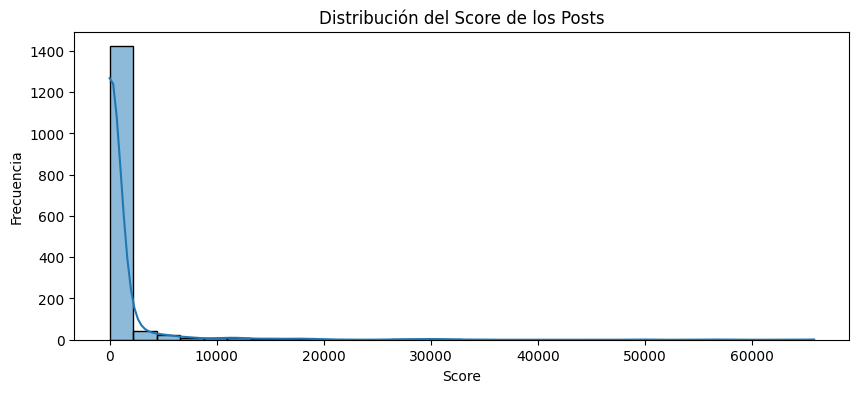

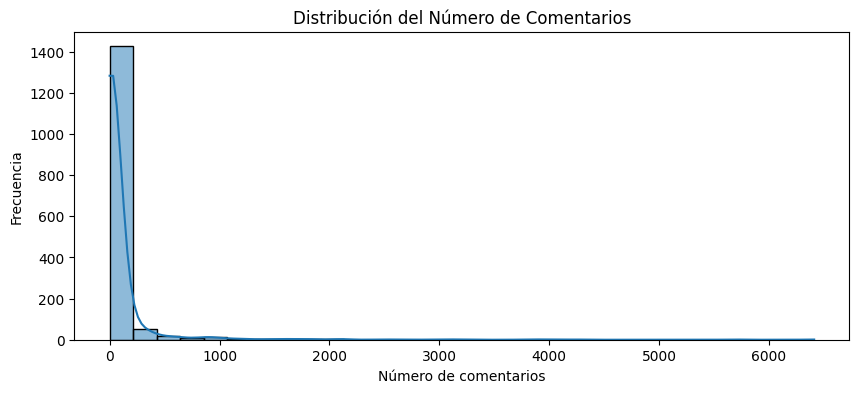

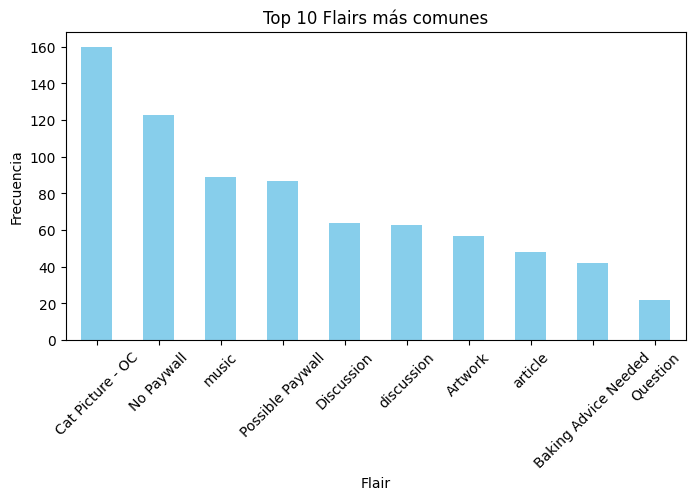

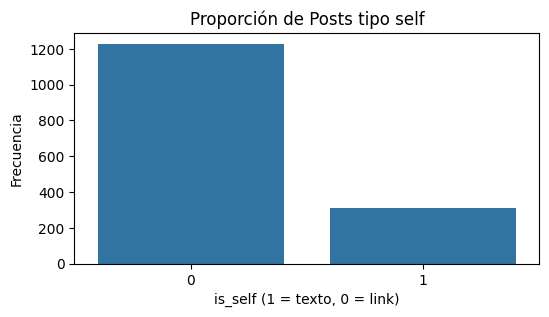

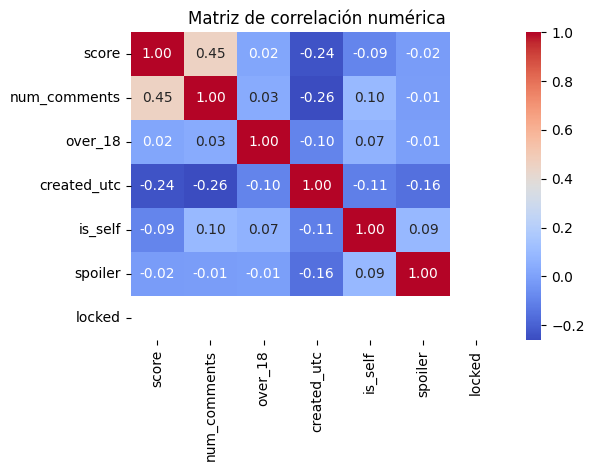

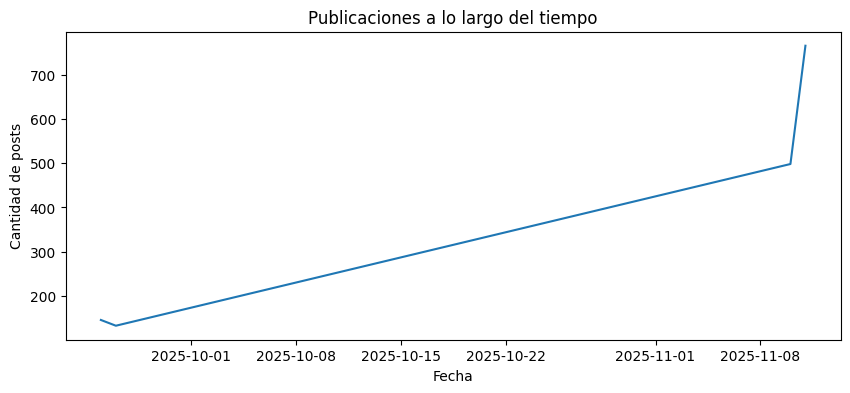

In [2]:
# =========================
# 🔍 EDA INICIAL: TABLA POSTS
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Vista general ---
print("=== Información general ===")
display(posts.info())

print("\n=== Primeras filas ===")
display(posts.head())

print("\n=== Tipos de datos ===")
display(posts.dtypes)

# --- 2. Valores nulos ---
print("\n=== Valores nulos por columna ===")
display(posts.isnull().sum().sort_values(ascending=False))

# --- 3. Estadísticas descriptivas ---
print("\n=== Estadísticas descriptivas (numéricas) ===")
display(posts.describe())

# --- 4. Distribución de variables clave ---
plt.figure(figsize=(10, 4))
sns.histplot(posts['score'], bins=30, kde=True)
plt.title('Distribución del Score de los Posts')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(posts['num_comments'], bins=30, kde=True)
plt.title('Distribución del Número de Comentarios')
plt.xlabel('Número de comentarios')
plt.ylabel('Frecuencia')
plt.show()

# --- 5. Variables categóricas ---
plt.figure(figsize=(8, 4))
posts['link_flair_text'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Flairs más comunes')
plt.xlabel('Flair')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(data=posts, x='is_self')
plt.title('Proporción de Posts tipo self')
plt.xlabel('is_self (1 = texto, 0 = link)')
plt.ylabel('Frecuencia')
plt.show()

# --- 6. Correlaciones numéricas ---
numeric_cols = posts.select_dtypes(include=['number'])
corr = numeric_cols.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación numérica')
plt.show()

# --- 7. Distribución temporal (si aplica) ---
if 'created_utc' in posts.columns:
    posts['created_dt'] = pd.to_datetime(posts['created_utc'], unit='s', errors='coerce')
    plt.figure(figsize=(10, 4))
    posts['created_dt'].dt.date.value_counts().sort_index().plot()
    plt.title('Publicaciones a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de posts')
    plt.show()

# EDA extendido: análisis del rendimiento de los posts (`score`)

Este bloque amplía el análisis del **target `score`** dentro de la tabla `posts`, explorando su comportamiento general, su relación con otras variables y su evolución temporal.  
El propósito es comprender los factores asociados al rendimiento o viralidad de las publicaciones.

---

## Información general del dataset

- Total de registros: **1542 publicaciones**  
- Total de variables: **17 columnas** (`created_dt` ya derivada)  
- Tipos de datos:  
  - 9 `object`, 6 `int64`, 1 `float64`, 1 `datetime64[ns]`  
- Valores nulos: **solo `link_flair_text` (368 faltantes)**  
- Variables binarias: `over_18`, `is_self`, `spoiler`, `locked`  
- Columnas potencialmente con fuga para modelado supervisado: `post_id`, `url`, `permalink`, `thumbnail`, `score`

---

## Distribución del target `score`

- **count 1542 • mean 935.04 • median 22 • p75 182 • max 65,830**  
- La distribución es **altamente asimétrica con cola derecha** (pocos posts muy virales).  
- La transformación **`log1p(score)`** revela una forma más estable para análisis y modelado.

---

## Relaciones con otras variables

### 1) `num_comments` vs `score` (escala log1p)
- Dispersión con **tendencia creciente clara**; correlación aproximada **r ≈ 0.45**.  
- Conclusión: **más comentarios ↔ mayor score**, aunque existen outliers.

### 2) Variables binarias (`is_self`, `over_18`, `spoiler`, `locked`)
- **`is_self`**: los **enlaces (0)** superan a los posts de **texto (1)** en score (boxplot).  
- **`over_18` y `spoiler`**: poco frecuentes; efecto marginal.  
- **`locked`**: sin variabilidad (todos 0).

### 3) `link_flair_text` y rendimiento promedio
- **Top por score promedio (ejemplos del Top 10)**: *Misleading Title*, *Release the Epstein files*, *Tylenol Rapid Release the Epstein files*, *I feel bad for the dog*, *Arts/Crafts*, *ADBLOCK WARNING*, *Image*, `:Misc:` y *AMA*.  
- Lectura: ciertos **tópicos polémicos/actualidad** elevan la visibilidad.

### 4) Evolución temporal del score
- El **score promedio diario decrece** a lo largo del periodo observado, con picos puntuales → efecto de **eventos coyunturales**.

### 5) Longitud de texto y título
- `title_len` y `selftext_len` muestran **relación débil** con `score`: hay posts de alto rendimiento en rangos de longitud variados.

### 6) Contenido textual (WordCloud)
- En títulos con alto score destacan términos como **“Trump”, “Democrat”, “shutdown”, “Supreme Court”, “election”, “cat”** → **política/actualidad** y temas virales.

---

## Insights principales

- **Alta asimetría del target**: pocos posts explican la mayor parte del score total.  
- **Engagement** (comentarios) es el principal correlato del éxito.  
- **Tipo de contenido**: los enlaces tienden a rendir mejor que los posts de texto.  
- **Temática**: flairs y keywords polémicas/actualidad concentran los mayores promedios de score.  
- **Temporalidad**: caída del promedio con picos event-driven.  
- **Longitud**: no determina el rendimiento.

---

## Recomendaciones y decisiones de EDA

1. **Usar `log1p(score)`** o un objetivo robusto (p. ej., `score_clipped`) para estabilizar la escala.  
2. **Excluir fugas**: `post_id`, `url`, `permalink`, `thumbnail` (y el propio `score` como feature).  
3. **Imputar nulos** en `link_flair_text` (p. ej., `'unknown'`) y **normalizar/collapse** categorías raras.  
4. **Features recomendadas**:  
   - **Numéricas**: `num_comments`, `title_len`, `selftext_len`  
   - **Categóricas**: `is_self`, `subreddit`, `author`, `link_flair_text`  
   - **Temporales** derivados de `created_dt` (mes, día de semana, hora, recency)  
5. **Validación temporal** cuando se modele por fecha (evitar fuga futura).

**Conclusión:** el rendimiento de un post se explica ante todo por **interacción y temática**; la **longitud** y el **formato de texto** por sí solos no anticipan el éxito.


=== Información general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          1542 non-null   object        
 1   title            1542 non-null   object        
 2   selftext         1542 non-null   object        
 3   url              1542 non-null   object        
 4   permalink        1542 non-null   object        
 5   score            1542 non-null   int64         
 6   num_comments     1542 non-null   int64         
 7   over_18          1542 non-null   int64         
 8   created_utc      1542 non-null   float64       
 9   link_flair_text  1174 non-null   object        
 10  is_self          1542 non-null   int64         
 11  spoiler          1542 non-null   int64         
 12  locked           1542 non-null   int64         
 13  thumbnail        1542 non-null   object        
 14  subreddit   

None


=== Estadísticas del target (score) ===


count     1542.000000
mean       935.038262
std       4038.678587
min          0.000000
25%          3.000000
50%         22.000000
75%        182.000000
max      65830.000000
Name: score, dtype: float64

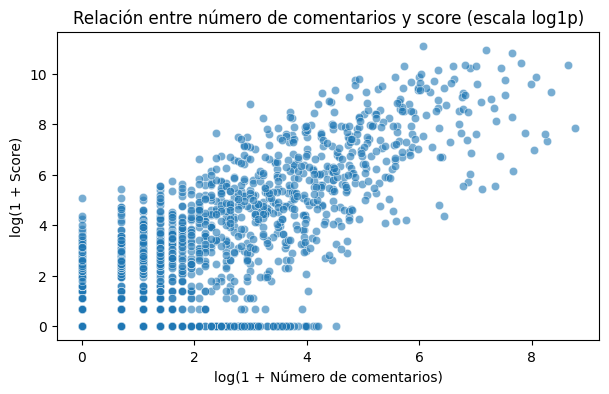

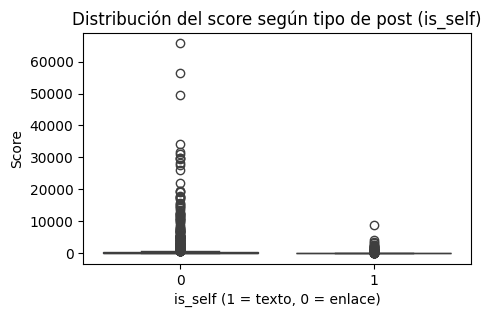

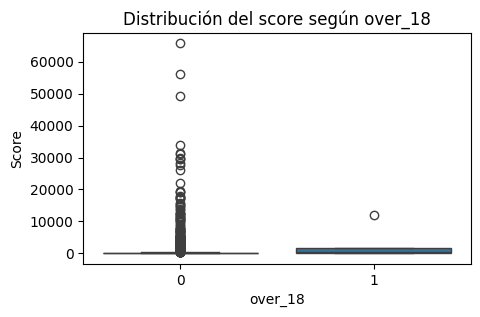

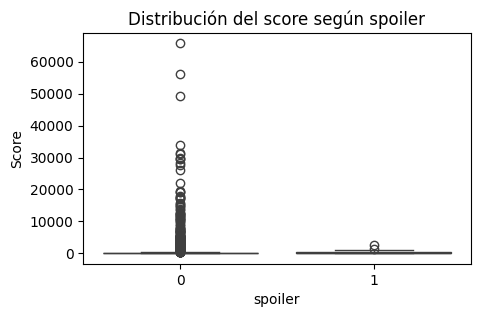

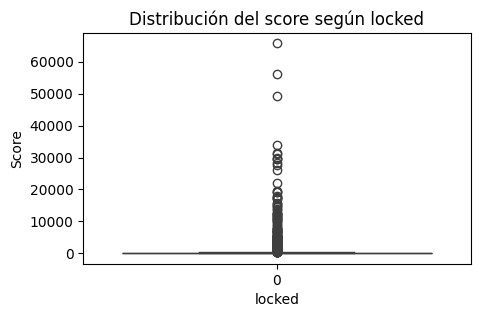

/Users/msgarcia/Desktop/School/proyecto_2/IMEDIA_Project_v2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/msgarcia/Desktop/School/proyecto_2/IMEDIA_Project_v2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/msgarcia/Desktop/School/proyecto_2/IMEDIA_Project_v2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/msgarcia/Desktop/School/proyecto_2/IMEDIA_Project_v2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaV

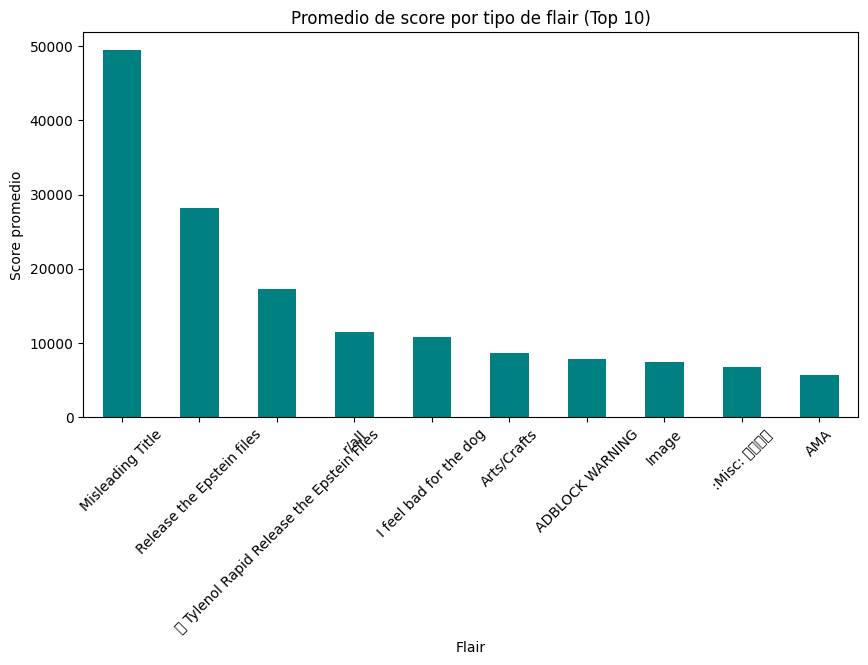

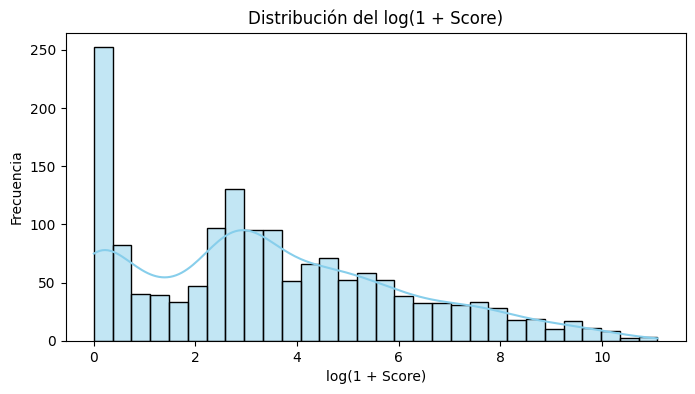

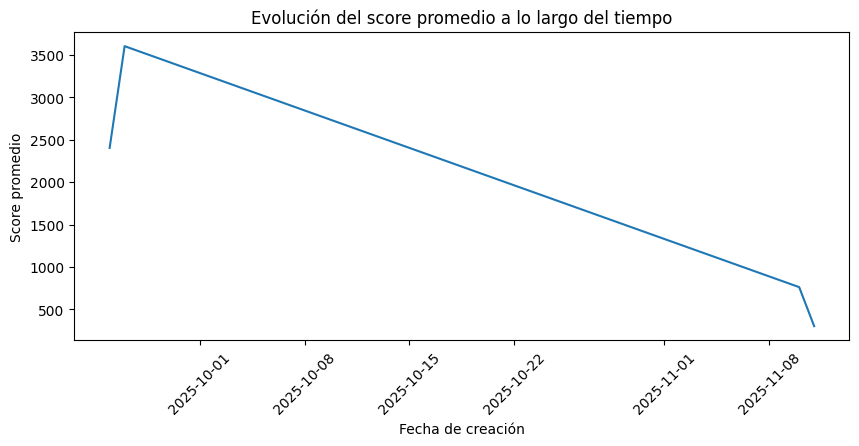

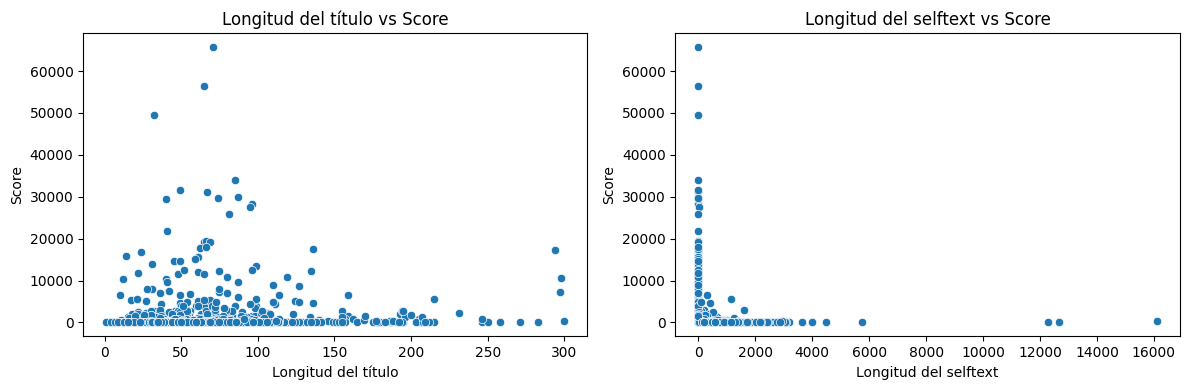

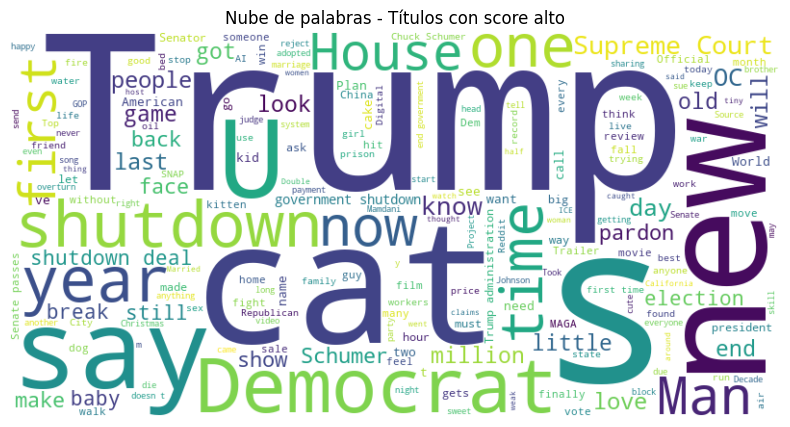

In [3]:
# ===============================
# 🎯 EDA ENFOCADO EN EL TARGET: score
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# --- 1. Resumen general ---
print("=== Información general ===")
display(posts.info())

print("\n=== Estadísticas del target (score) ===")
display(posts['score'].describe())

# --- 2. Scatter log-log: num_comments vs score ---
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=posts,
    x=np.log1p(posts['num_comments']),
    y=np.log1p(posts['score']),
    alpha=0.6
)
plt.title("Relación entre número de comentarios y score (escala log1p)")
plt.xlabel("log(1 + Número de comentarios)")
plt.ylabel("log(1 + Score)")
plt.show()

# --- 3. Boxplot de score por tipo de post (is_self) ---
plt.figure(figsize=(5,3))
sns.boxplot(data=posts, x='is_self', y='score')
plt.title("Distribución del score según tipo de post (is_self)")
plt.xlabel("is_self (1 = texto, 0 = enlace)")
plt.ylabel("Score")
plt.show()

# --- 4. Efecto de variables binarias sobre el score ---
binary_cols = ['over_18', 'spoiler', 'locked']
for col in binary_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=posts, x=col, y='score')
    plt.title(f"Distribución del score según {col}")
    plt.xlabel(col)
    plt.ylabel("Score")
    plt.show()

# --- 5. Análisis por categoría (link_flair_text) ---
if 'link_flair_text' in posts.columns:
    flair_means = posts.groupby('link_flair_text')['score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    flair_means.head(10).plot(kind='bar', color='teal')
    plt.title("Promedio de score por tipo de flair (Top 10)")
    plt.ylabel("Score promedio")
    plt.xlabel("Flair")
    plt.xticks(rotation=45)
    plt.show()

# --- 6. Histograma del score en escala log ---
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(posts['score']), bins=30, kde=True, color='skyblue')
plt.title("Distribución del log(1 + Score)")
plt.xlabel("log(1 + Score)")
plt.ylabel("Frecuencia")
plt.show()

# --- 7. Análisis temporal: evolución promedio del score ---
if 'created_utc' in posts.columns:
    posts['created_dt'] = pd.to_datetime(posts['created_utc'], unit='s', errors='coerce')
    temporal_avg = posts.groupby(posts['created_dt'].dt.date)['score'].mean()
    plt.figure(figsize=(10,4))
    sns.lineplot(x=temporal_avg.index, y=temporal_avg.values)
    plt.title("Evolución del score promedio a lo largo del tiempo")
    plt.xlabel("Fecha de creación")
    plt.ylabel("Score promedio")
    plt.xticks(rotation=45)
    plt.show()

# --- 8. Relación longitud de texto/título con score ---
posts['title_len'] = posts['title'].astype(str).apply(len)
posts['selftext_len'] = posts['selftext'].astype(str).apply(len)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(ax=axes[0], data=posts, x='title_len', y='score')
axes[0].set_title("Longitud del título vs Score")
axes[0].set_xlabel("Longitud del título")
axes[0].set_ylabel("Score")

sns.scatterplot(ax=axes[1], data=posts, x='selftext_len', y='score')
axes[1].set_title("Longitud del selftext vs Score")
axes[1].set_xlabel("Longitud del selftext")
axes[1].set_ylabel("Score")

plt.tight_layout()
plt.show()

# --- 9. WordCloud de títulos con alto score ---
high_score_titles = " ".join(posts.loc[posts['score'] > posts['score'].median(), 'title'].astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(high_score_titles)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Títulos con score alto")
plt.show()
